# Required Modules

Matplotlib, Pandas, Seaborn, and Statsmodels

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import path

def get_dataset_path():
    LOCAL_PATH = '6 class csv.csv'
    KAGGLE_PATH = '/kaggle/input/star-dataset/6 class csv.csv'
    if path.exists(LOCAL_PATH):
        return LOCAL_PATH
    elif path.exists(KAGGLE_PATH):
        return KAGGLE_PATH
    else:
        raise 'Cannot find star data csv file'

def star_type_index_to_name(index: int):
    NAMES = ('Brown Dwarf','Red Dwarf','White Dwarf','Main Sequence','Supergiant','Hypergiant')
    return NAMES[index]

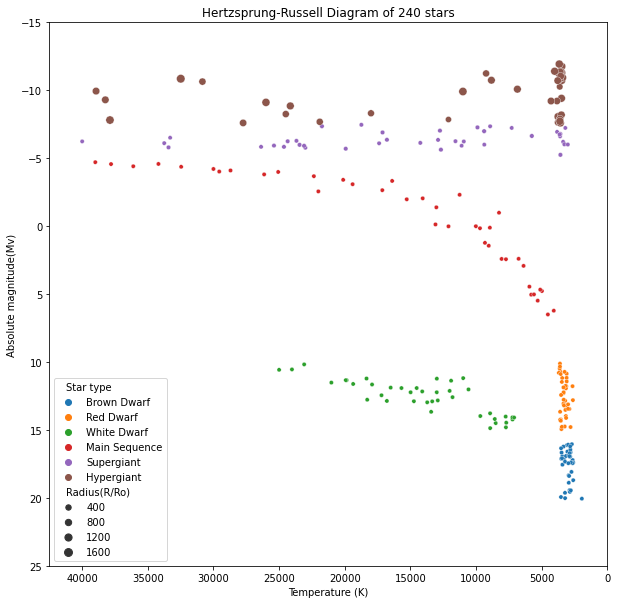

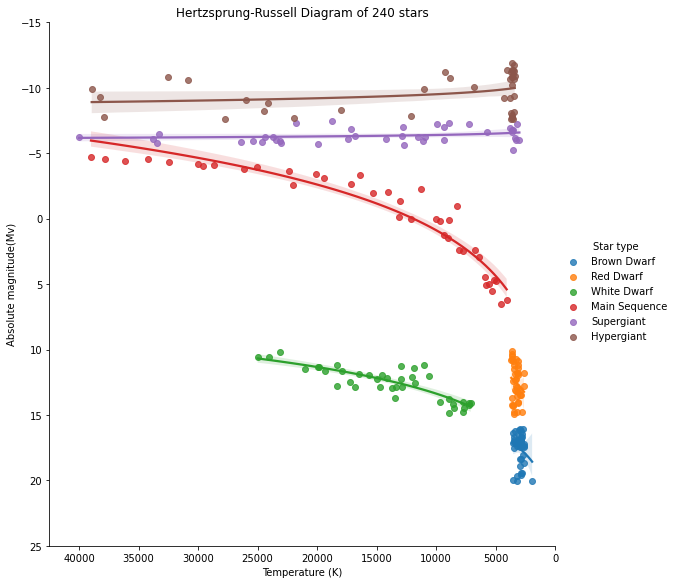

In [4]:
star_df = pd.read_csv(get_dataset_path())
star_df['Star type'] = star_df['Star type'].map(star_type_index_to_name)

Y_LIMITS = (25, -15) # Abs Magnitude that decreases upwards along the y-axis
X_LIMITS = (42500, 0) # Temperature that decreases along the x-axis
TITLE = f'Hertzsprung-Russell Diagram of {len(star_df)} stars'

# Create and save a regular plot as a HR Diagram
fig_noreg, ax_noreg = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=star_df, x='Temperature (K)', y='Absolute magnitude(Mv)', hue='Star type', size='Radius(R/Ro)', ax=ax_noreg)
ax_noreg.set(xlim=X_LIMITS, ylim=Y_LIMITS, title=TITLE)
fig_noreg.savefig('fig_no_regression.svg')

# Create and save a plot with regression lines
fig_reg = sns.lmplot(data=star_df, x='Temperature (K)', y='Absolute magnitude(Mv)', hue='Star type', logx=True, height=8)
fig_reg.set(xlim=X_LIMITS, ylim=Y_LIMITS, title=TITLE)
fig_reg.savefig('fig_regression.svg')
